In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
def rho_0(r):
    if r<=3:
        return np.exp(8/8.5)*np.exp(-3/8.5)
    return np.exp(8/8.5)*np.exp(-r/8.5)

def g_z(r,z):
    return mt.force_T(r,0,z)[-1]

def P_integrated(r,z):
    s = np.sign(z)
    z = abs(z)
    zz = np.linspace(0,z,int(np.floor(z/.001)))
    return s*sum(g_z(r,s*zz[i])*(zz[i]-zz[i-1]) for i in range(1,len(zz)))

def rho(r,z):
    return rho_0(r)*np.exp(P_integrated(r,z)/cs2)

In [3]:
zz = np.linspace(-1.5,1.5,200)

meff = 1.672649e-24 * 1.27
kb = 1.3807e-23
T = 1.0e4*gK
gK = mean_mol_weight / scale_T2
erg = gr * ( cm / sec )**2
meff = mean_mol_weight * m_H
mean_mol_weight = 1.27d0
m_H  = 1.672649d-24 * gr
k_B  = 1.3807d-16 * erg / gK
cm = 1.d0 / scale_l
sec = 1.d0 / scale_t
gK = mean_mol_weight / scale_T2
scale_v = scale_l / scale_t
scale_T2 = mH/kB * scale_v**2
scale_l = kpc_unit
scale_t = 1.0 /sqrt(G_unit*scale_d) 
scale_d =  scale_m/scale_l**3
scale_m = 3.131D7*Mo_unit
Mo_unit = 1.9891D33

cs2 = k_b*T/meff
cs2 = (1.3807d-16 * erg / gK)* (1.0d4*gK) / (mean_mol_weight * m_H)
cs2 = (1.3807d-16 * gr * ( cm / sec )**2 / gK)* (1.0d4*gK) / (1.27 * 1.672649d-24 * gr)

In [50]:
cs2 = (1.3807e-16 )* (1.0e4) / (1.27 * 1.672649e-24)*(mt.C.cm.express(mt.C.kpc))**2

In [56]:
np.sqrt((1.3807e-16 )* (1.0e4) / (1.27 * 1.672649e-24))*(mt.C.cm.express(mt.C.m)),np.sqrt(cs2)

(8062.048274691695, 2.612732400277701e-16)

In [52]:
rhorho3 = [rho(3.,z) for z in zz] 
rhorho8 = [rho(8.,z) for z in zz] 
rhorho10 = [rho(10.,z) for z in zz]

In [66]:
rr = np.linspace(.0000,15,500)
rhorhop0 = [rho(r,0.) for r in rr] 
rhorhop1 = [rho(r,.1) for r in rr]
rhorhop3 = [rho(r,-.3) for r in rr]

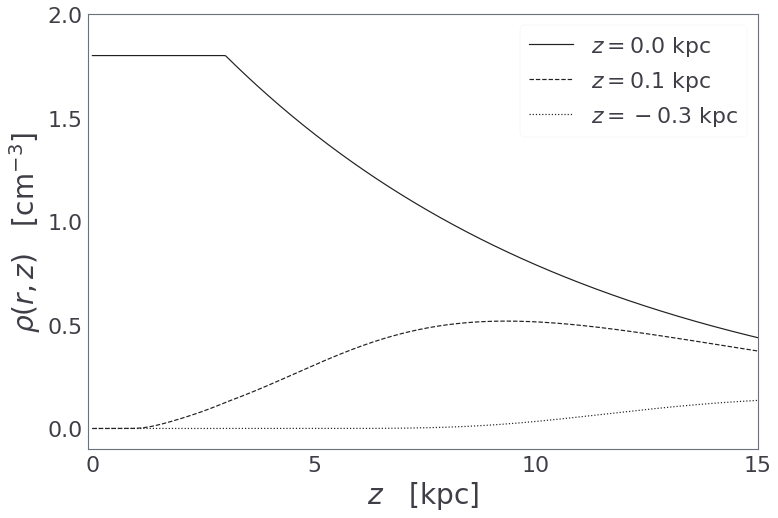

In [70]:
plt.figure(figsize=(12,8))
plt.plot(rr,rhorhop0,c='k',label='$z=0.0$ kpc')
plt.plot(rr,rhorhop1,c='k',ls='--',label='$z=0.1$ kpc')
plt.plot(rr,rhorhop3,c='k',ls=':',label='$z=-0.3$ kpc')
plt.xlabel(r'$z$   [kpc]',fontsize=28)
plt.ylabel(r'$\rho(r,z)$   [cm$^{-3}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(-.1,2)
plt.xlim(-.1,15)
#plt.yscale('log')
plt.show()

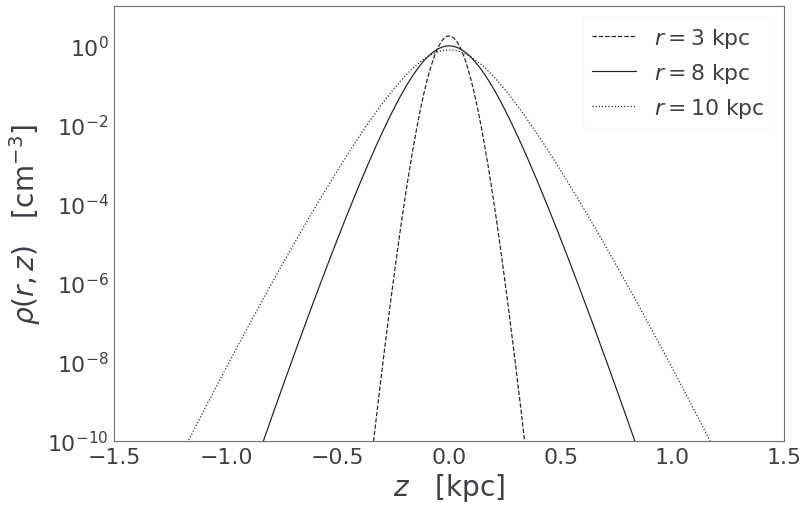

In [71]:
plt.figure(figsize=(12,8))
plt.plot(zz,rhorho3 ,c='k',ls='--',label='$r=3$ kpc')
plt.plot(zz,rhorho8 ,c='k',label='$r=8$ kpc')
plt.plot(zz,rhorho10,c='k',ls=':',label='$r=10$ kpc')
plt.xlabel(r'$z$   [kpc]',fontsize=28)
plt.ylabel(r'$\rho(r,z)$   [cm$^{-3}$]',fontsize=28)
plt.legend(loc='best',fontsize=22)
plt.locator_params(nbins=6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(1e-10,10)
plt.xlim(-1.5,1.5)
plt.yscale('log')
plt.show()

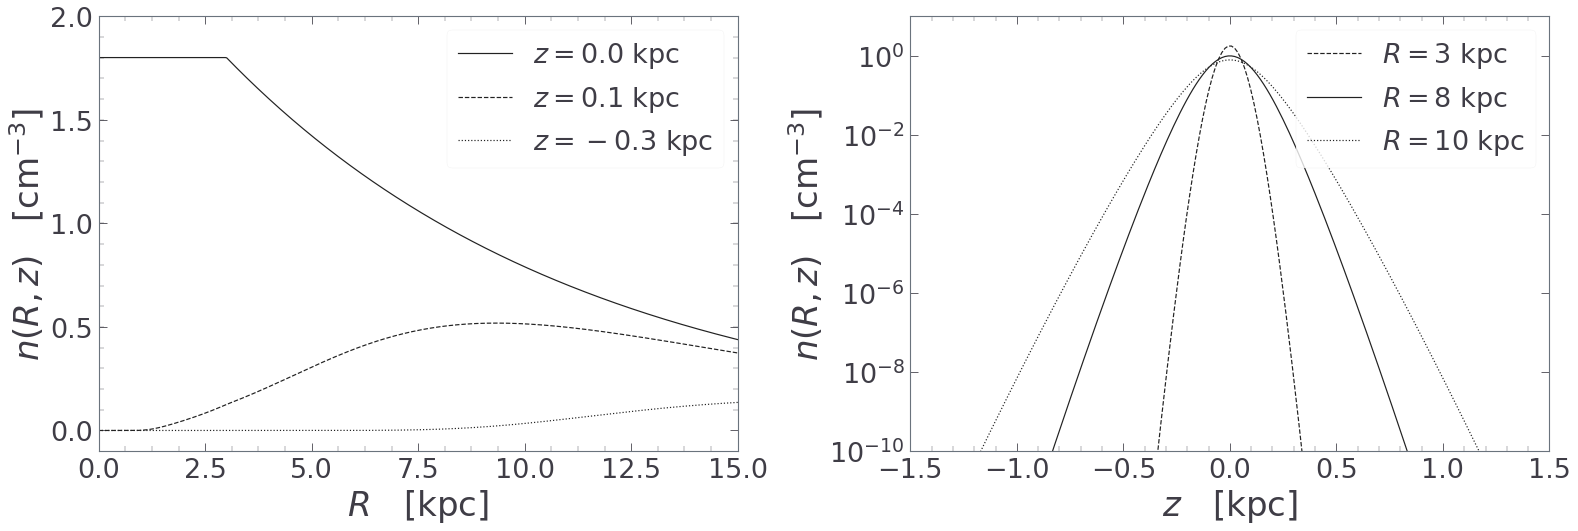

In [97]:
fig, axes = plt.subplots(1, 2,figsize=(26,8))

axes[0].plot(rr,rhorhop0,c='k',label='$z=0.0$ kpc')
axes[0].plot(rr,rhorhop1,c='k',ls='--',label='$z=0.1$ kpc')
axes[0].plot(rr,rhorhop3,c='k',ls=':',label='$z=-0.3$ kpc')
axes[0].set_xlabel(r'$R$   [kpc]',fontsize=34)
axes[0].set_ylabel(r'$n(R,z)$   [cm$^{-3}$]',fontsize=34)
axes[0].legend(loc='best',fontsize=27)
axes[0].locator_params(nbins=6)
#axes[0].set_xticks(fontsize=22)
#axes[0].set_yticks(fontsize=22)
axes[0].set_ylim(-.1,2)
axes[0].set_xlim(0,15)

axes[1].plot(zz,rhorho3 ,c='k',ls='--',label='$R=3$ kpc')
axes[1].plot(zz,rhorho8 ,c='k',label='$R=8$ kpc')
axes[1].plot(zz,rhorho10,c='k',ls=':',label='$R=10$ kpc')
axes[1].set_xlabel(r'$z$   [kpc]',fontsize=34)
axes[1].set_ylabel(r'$n(R,z)$   [cm$^{-3}$]',fontsize=34)
axes[1].legend(loc=1,fontsize=27)
axes[1].locator_params(nbins=6)
#axes[1].set_xticks(fontsize=22)
#axes[1].set_yticks(fontsize=22)
axes[1].set_ylim(1e-10,10)
axes[1].set_xlim(-1.5,1.5)
axes[1].set_yscale('log')

for i in range(2):
    axes[i].tick_params(which='major',direction='in',right=True,top=True,length=8,labelsize=27)
    axes[i].minorticks_on()
    axes[i].tick_params(which='minor',direction='in',right=True,top=True,length=5)
plt.subplots_adjust(hspace=0,wspace=.27)
fig.savefig("densidad vs rz.pdf", format='pdf',bbox_inches='tight')


